<a href="https://colab.research.google.com/github/Eric881028/-/blob/%E5%B7%A8%E9%87%8F%E8%B3%87%E6%96%99%E4%BD%9C%E6%A5%AD/transfer_learning_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from PIL import Image


In [4]:
#讀取cifar10圖片資料集
#內含10個類別的圖片，分別是飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船、卡車
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
#將圖片順序打亂
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

In [6]:
X_train, Y_train = randomize(X_train, Y_train)
X_test, Y_test = randomize(X_test, Y_test)

In [7]:
#depends on runtime RAM for your adjustment
X_train = X_train[:500]
Y_train = Y_train[:500]
X_test = X_test[:100]
Y_test = Y_test[:100]

In [8]:
#scale your image to 200x200 for training data (enlarge your image size)
print("enlarge your training image size to 200x200")

X_train_new = np.array(
  [np.asarray(Image.fromarray(X_train[i]).resize(
          (200, 200))) for i in range(0, len(X_train))])

X_train_new = X_train_new.astype("float32")

enlarge your training image size to 200x200


In [9]:
#scale your image to 200x200 for testing data (enlarge your image size)
print("enlarge your testing image size to 200x200")

X_test_new = np.array(
  [np.asarray(Image.fromarray(X_test[i]).resize(
          (200, 200))) for i in range(0, len(X_test))])

X_test_new = X_test_new.astype("float32")

enlarge your testing image size to 200x200


In [10]:
#預處理對一批圖像進行編碼的張量或Numpy數組

train_input = preprocess_input(X_train_new)

In [11]:
#one-hot encoding
#10個類別

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [12]:
#load ResNet50 model
#take off top layer (FC)
resnet_model = ResNet50(weights="imagenet",
                        include_top=False,
                        input_shape=(200, 200, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [13]:
#因為該網路模型不包含include_top，所以這邊的predict的結果為卷積層的輸出結果，我們稱為features

print("透過ResNet50網路模型，將訓練資料集的feature extraction取出來")
train_features = resnet_model.predict(train_input)

透過ResNet50網路模型，將訓練資料集的feature extraction取出來
16/16 [==============================] - 12s 116ms/step


In [14]:
#100張圖，每一張圖的shape為7x7x2048
#這些就是輸出的features的shape

train_features.shape

(500, 7, 7, 2048)

In [15]:
#預處理對一批圖像進行編碼的張量或Numpy數組

test_input = preprocess_input(X_test_new)

In [16]:
print("透過ResNet50網路模型，將測試資料集的feature extraction取出來")

test_features = resnet_model.predict(test_input)

透過ResNet50網路模型，將測試資料集的feature extraction取出來
4/4 [==============================] - 1s 237ms/step


In [17]:
#100張圖，每一張圖的shape為7x7x2048

test_features.shape

(100, 7, 7, 2048)

In [18]:
#自行建立一個model

model = Sequential()

#input_shape設定為features訓練資料集的shapes，這就是transfer learning的效果
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [19]:
#compile

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
#擬合模型
#輸入的圖片訓練資料集為: 利用ResNet50將訓練資料集產出的feature_maps；同理，測試資料集也比照辦理

history = model.fit(train_features, Y_train,
                    validation_data=(test_features, Y_test), 
                    epochs=15, batch_size=32, verbose=2)

Epoch 1/15
16/16 - 2s - loss: 2.4491 - accuracy: 0.2240 - val_loss: 1.4787 - val_accuracy: 0.5000 - 2s/epoch - 106ms/step
Epoch 2/15
16/16 - 0s - loss: 1.3208 - accuracy: 0.5240 - val_loss: 0.9559 - val_accuracy: 0.6900 - 199ms/epoch - 12ms/step
Epoch 3/15
16/16 - 0s - loss: 0.8824 - accuracy: 0.7180 - val_loss: 0.7831 - val_accuracy: 0.7700 - 198ms/epoch - 12ms/step
Epoch 4/15
16/16 - 0s - loss: 0.7210 - accuracy: 0.7580 - val_loss: 0.7056 - val_accuracy: 0.7800 - 166ms/epoch - 10ms/step
Epoch 5/15
16/16 - 0s - loss: 0.5188 - accuracy: 0.8360 - val_loss: 0.6687 - val_accuracy: 0.7800 - 209ms/epoch - 13ms/step
Epoch 6/15
16/16 - 0s - loss: 0.4671 - accuracy: 0.8440 - val_loss: 0.6535 - val_accuracy: 0.7600 - 195ms/epoch - 12ms/step
Epoch 7/15
16/16 - 0s - loss: 0.3726 - accuracy: 0.9000 - val_loss: 0.6225 - val_accuracy: 0.8000 - 186ms/epoch - 12ms/step
Epoch 8/15
16/16 - 0s - loss: 0.3420 - accuracy: 0.9060 - val_loss: 0.5982 - val_accuracy: 0.7800 - 195ms/epoch - 12ms/step
Epoch 9/15

In [21]:
#evaluate

loss, accuracy = model.evaluate(test_features, Y_test)
print("testing dataset = {:.2f}".format(accuracy))

4/4 [==============================] - 0s 7ms/step - loss: 0.6102 - accuracy: 0.7700
testing dataset = 0.77


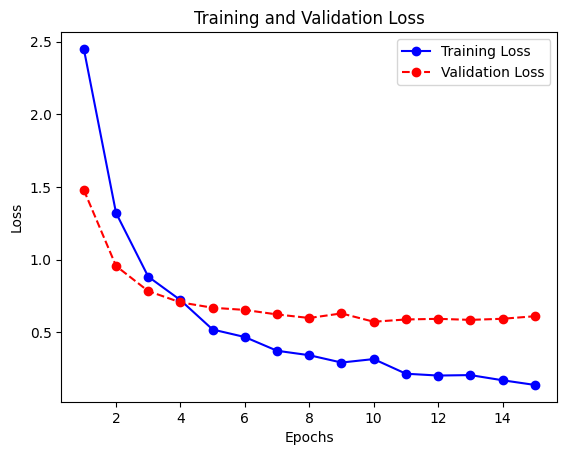

In [22]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

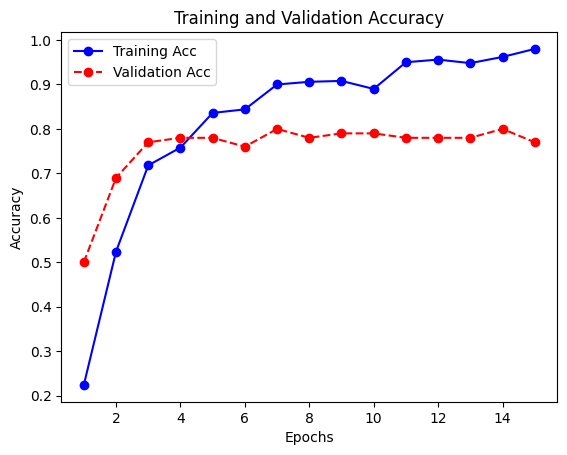

In [23]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 本transfer learning範例，使用ResNet50模型與imagenet參數，取出cifar-10圖片的feature maps
## 再自建一個網路模型，以訓練與測試資料集的features map重新建立網路模型

In [24]:
#作業
#透過已經完成的fine tune模型進行照片推論，請自行上網抓取cifar-10的類別照片進行推論

In [ ]:
import shutil

# 指定要刪除的資料夾路徑
folder_path = 'cifar10_inference'

# 使用shutil模組的rmtree函式刪除資料夾及其內容
shutil.rmtree(folder_path)

In [51]:
#安裝套件用於抓取google drive圖片
!mkdir -p cifar10_inference
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
#下載圖片至VM端
url='https://drive.google.com/file/d/1KZgjMPLdzwl8rBoXhcgpYZgAl-JxxKJT/view?usp=share_link'
output='cifar10_inference/cifar10.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1KZgjMPLdzwl8rBoXhcgpYZgAl-JxxKJT
To: /content/cifar10_inference/cifar10.zip
100%|██████████| 5.11M/5.11M [00:00<00:00, 28.8MB/s]


'cifar10_inference/cifar10.zip'

In [60]:
url='https://drive.google.com/file/d/19vG_0K1LfeR_LegR8hA8lOwHVr9EmC0P/view?usp=share_link'
output='cifar10_inference/all.zip'
import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=19vG_0K1LfeR_LegR8hA8lOwHVr9EmC0P
To: /content/cifar10_inference/all.zip
100%|██████████| 5.10M/5.10M [00:00<00:00, 197MB/s]


'cifar10_inference/all.zip'

In [61]:
#解壓縮圖片檔
!unzip cifar10_inference/cifar10.zip -d cifar10_inference

Archive:  cifar10_inference/cifar10.zip
   creating: cifar10_inference/cifar10/bird/
  inflating: cifar10_inference/cifar10/bird/bird (1).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (21).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (22).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (23).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (24).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (25).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (26).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (27).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (28).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (29).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (30).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (31).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (32).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (33).jpg  
  inflating: cifar10_inference/cifar10/bird/bird (34).jpg  
  inflating: cif

In [62]:
#解壓縮圖片檔
!unzip cifar10_inference/all.zip -d cifar10_inference

Archive:  cifar10_inference/all.zip
replace cifar10_inference/all/bird (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [64]:
import os

# 設定照片存放的資料夾路徑
image_folder = 'cifar10_inference/cifar10/bird'

# 取得資料夾中的所有照片檔案路徑
image_files = os.listdir(image_folder)

# 迴圈處理每張照片
for file in image_files:
    # 讀取照片並進行預處理
    image_path = os.path.join(image_folder, file)
    image = Image.open(image_path)
    image = image.resize((200, 200))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    # 使用ResNet50模型獲取特徵向量
    features = resnet_model.predict(image)

    # 使用自建模型進行推論
    predictions = model.predict(features)

    # 根據模型訓練的類別索引，獲得預測結果的類別
    predicted_class = np.argmax(predictions)

    # 根據預測結果的類別索引，獲得類別標籤
    class_labels = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']
    predicted_label = class_labels[predicted_class]

    # 輸出預測結果
    print("照片:", file)
    print("預測結果:", predicted_label)
    print("------------------")

1/1 [==============================] - 0s 22ms/step
照片: bird (23).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 21ms/step
照片: bird (22).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 19ms/step
照片: bird (27).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 21ms/step
照片: bird (25).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 21ms/step
照片: bird (29).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 24ms/step
照片: bird (24).jpg
預測結果: 青蛙
------------------
1/1 [==============================] - 0s 20ms/step
照片: bird (1).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 22ms/step
照片: bird (26).jpg
預測結果: 飛機
------------------
1/1 [==============================] - 0s 19ms/step
照片: bird (21).jpg
預測結果: 鳥
------------------
1/1 [==============================] - 0s 20ms/step
照片: bird (37).jpg
預測結果: 鳥
------------------
1/1 [========================

In [68]:
import random

# 設定照片存放的資料夾路徑
data_folder = 'cifar10_inference/cifar10'
class_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']
#['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

# 迴圈處理每個資料夾
for label in class_labels:
    image_folder = os.path.join(data_folder, label)
    
    # 取得資料夾中的所有照片檔案路徑
    image_files = os.listdir(image_folder)
    
    # 從每個資料夾中隨機抽取9張圖片
    random_images = random.sample(image_files, 9)
    
    # 迴圈處理每張圖片
    for file in random_images:
        # 讀取照片並進行預處理
        image_path = os.path.join(image_folder, file)
        image = Image.open(image_path)
        image = image.resize((200, 200))
        image = np.array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)

        # 使用ResNet50模型獲取特徵向量
        features = resnet_model.predict(image)

        # 使用自建模型進行推論
        predictions = model.predict(features)

        # 根據模型訓練的類別索引，獲得預測結果的類別
        predicted_class = np.argmax(predictions)

        # 根據預測結果的類別索引，獲得類別標籤
        predicted_label = class_labels[predicted_class]

        # 輸出預測結果
        print("照片:", file)
        print("預測結果:", predicted_label)
        print("------------------")

1/1 [==============================] - 0s 18ms/step
照片: plane (8).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 17ms/step
照片: plane (11).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 32ms/step
照片: plane (13).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 41ms/step
照片: plane (5).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 28ms/step
照片: plane (19).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 29ms/step
照片: plane (12).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 26ms/step
照片: plane (6).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 94ms/step
照片: plane (15).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 19ms/step
照片: plane (2).jpg
預測結果: plane
------------------
1/1 [==============================] - 0s 18ms/step
照片: car (16).jpg
預測結果: car
-------

1/1 [==============================] - 0s 20ms/step


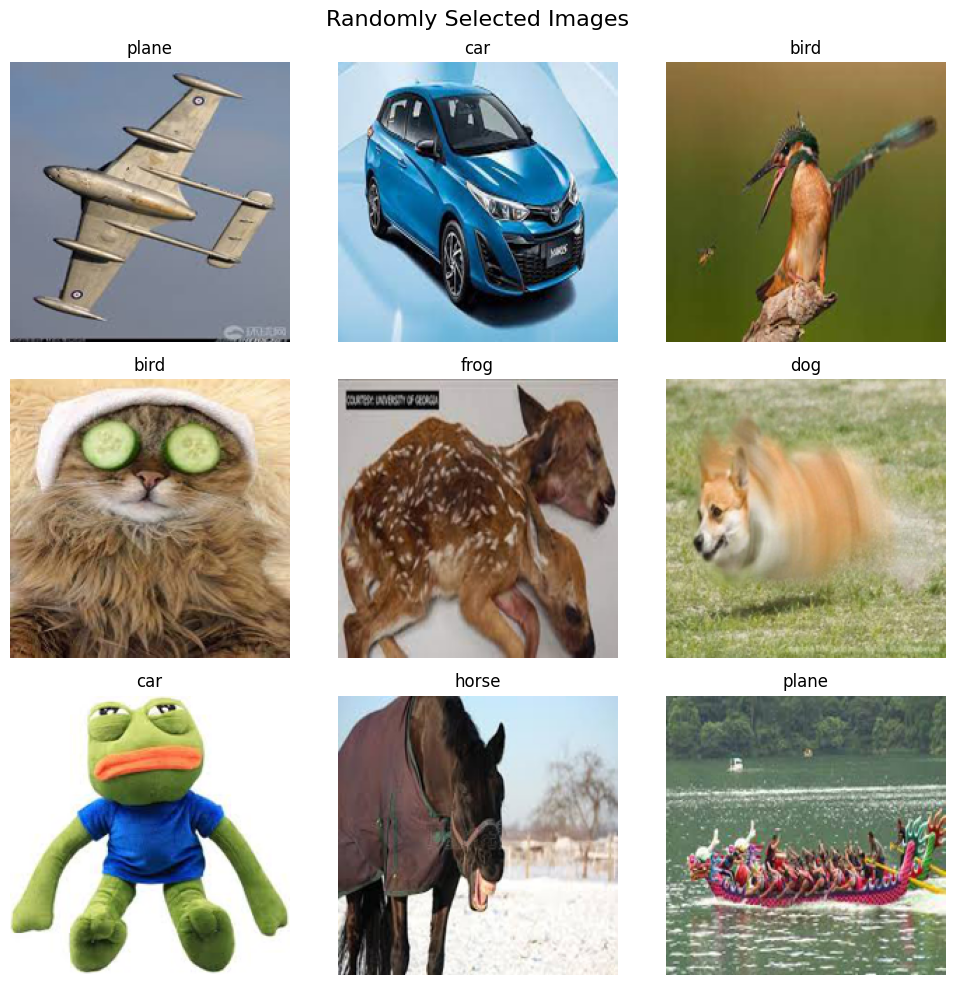

In [74]:
import random
import matplotlib.pyplot as plt

# 設定照片存放的資料夾路徑
data_folder = 'cifar10_inference/cifar10'
class_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

# 建立一個2x2的子圖表格
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# 設定圖表標題
fig.suptitle('Randomly Selected Images', fontsize=16)

# 迴圈處理每個資料夾
for i, label in enumerate(class_labels[:9]):
    image_folder = os.path.join(data_folder, label)
    
    # 取得資料夾中的所有照片檔案路徑
    image_files = os.listdir(image_folder)
    
    # 從每個資料夾中隨機抽取1張圖片
    random_image = random.choice(image_files)
    
    # 設定子圖位置
    row = i // 3
    col = i % 3
    
    # 讀取照片並進行預處理
    image_path = os.path.join(image_folder, random_image)
    image = Image.open(image_path)
    image = image.resize((200, 200))
    image = np.array(image)
    
    # 使用ResNet50模型獲取特徵向量
    features = resnet_model.predict(np.expand_dims(image, axis=0))
    
    # 使用自建模型進行推論
    predictions = model.predict(features)
    
    # 根據模型訓練的類別索引，獲得預測結果的類別
    predicted_class = np.argmax(predictions)
    
    # 根據預測結果的類別索引，獲得類別標籤
    predicted_label = class_labels[predicted_class]
    
    # 顯示圖片及預測結果在子圖中
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(predicted_label)

# 調整子圖間的間距
plt.tight_layout()

# 顯示圖表
plt.show()